In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [27]:
# 1. Connection Setup
# ---------------------------
server = "DESKTOP-1B2LKEO\\SQLEXPRESS01"
database = "Chinook"

connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)
engine = create_engine(connection_string)

In [29]:
# 1. Top Genres by Sales
genre_query = """
SELECT g.Name AS Genre, COUNT(il.InvoiceLineId) AS TotalSold
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY TotalSold DESC;
"""

In [31]:
# 2. Top Artists by Sales
artist_query = """
SELECT ar.Name AS Artist, COUNT(il.InvoiceLineId) AS TotalSold
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY TotalSold DESC
OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;
"""

In [33]:
# 3. Top Customers by Spending
customer_query = """
SELECT c.FirstName + ' ' + c.LastName AS Customer, SUM(i.Total) AS TotalSpent
FROM Invoice i
JOIN Customer c ON i.CustomerId = c.CustomerId
GROUP BY c.FirstName, c.LastName
ORDER BY TotalSpent DESC
OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;
"""

In [35]:
# 4. Sales Trend by Month/Year
trend_query = """
SELECT 
    DATENAME(YEAR, InvoiceDate) AS Year,
    DATENAME(MONTH, InvoiceDate) AS Month,
    SUM(Total) AS MonthlySales
FROM Invoice
GROUP BY DATENAME(YEAR, InvoiceDate), DATENAME(MONTH, InvoiceDate),
         YEAR(InvoiceDate), MONTH(InvoiceDate)
ORDER BY YEAR(InvoiceDate), MONTH(InvoiceDate);
"""

In [37]:
# 3. Load Data into Pandas
# ---------------------------
genre_df = pd.read_sql(genre_query, engine)
artist_df = pd.read_sql(artist_query, engine)
customer_df = pd.read_sql(customer_query, engine)
trend_df = pd.read_sql(trend_query, engine)

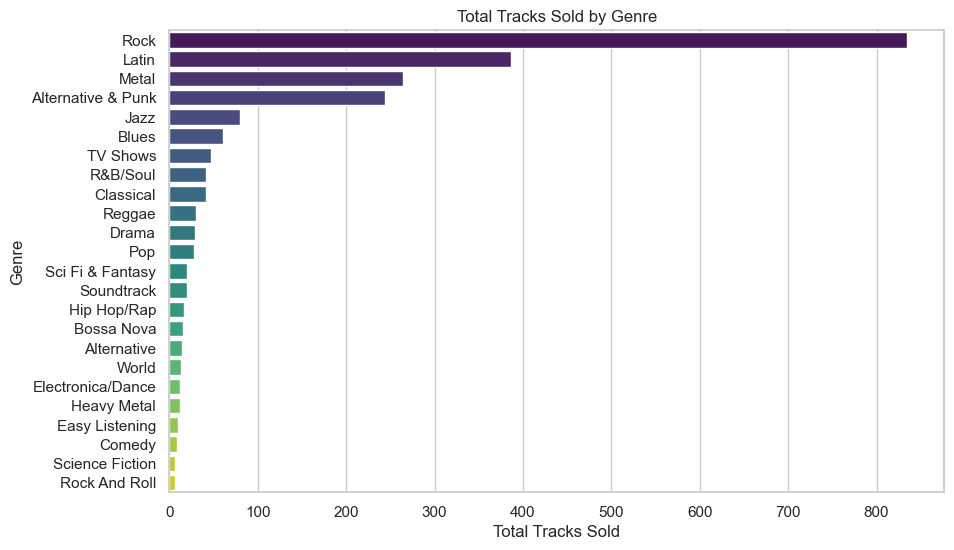

In [39]:
# 4. Visualizations
# ---------------------------
sns.set_theme(style="whitegrid")
# Genres
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x="TotalSold", y="Genre", hue="Genre", palette="viridis", legend=False)
plt.title("Total Tracks Sold by Genre")
plt.xlabel("Total Tracks Sold")
plt.ylabel("Genre")
plt.show()

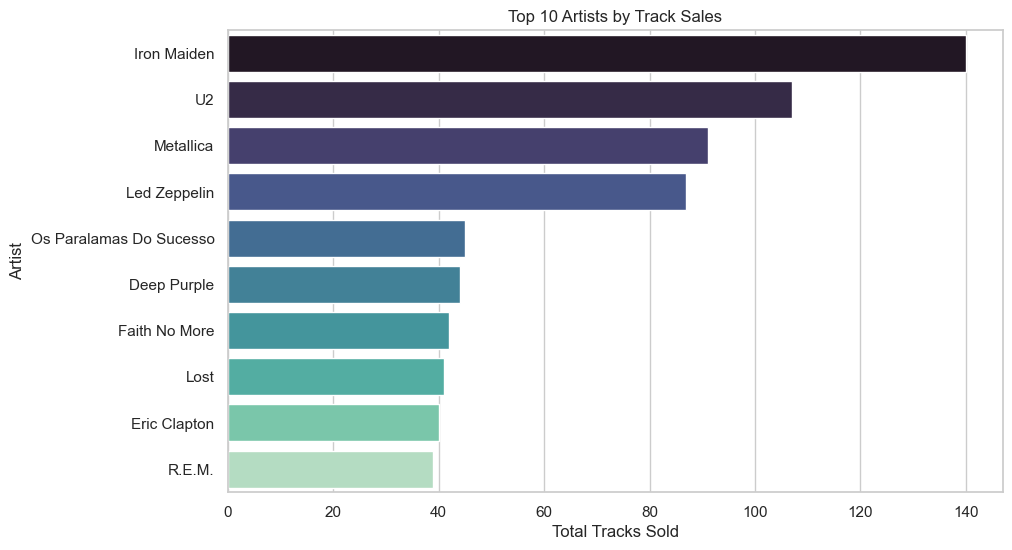

In [41]:
# Artists
plt.figure(figsize=(10,6))
sns.barplot(data=artist_df, x="TotalSold", y="Artist", hue="Artist", palette="mako", legend=False)
plt.title("Top 10 Artists by Track Sales")
plt.xlabel("Total Tracks Sold")
plt.ylabel("Artist")
plt.show()

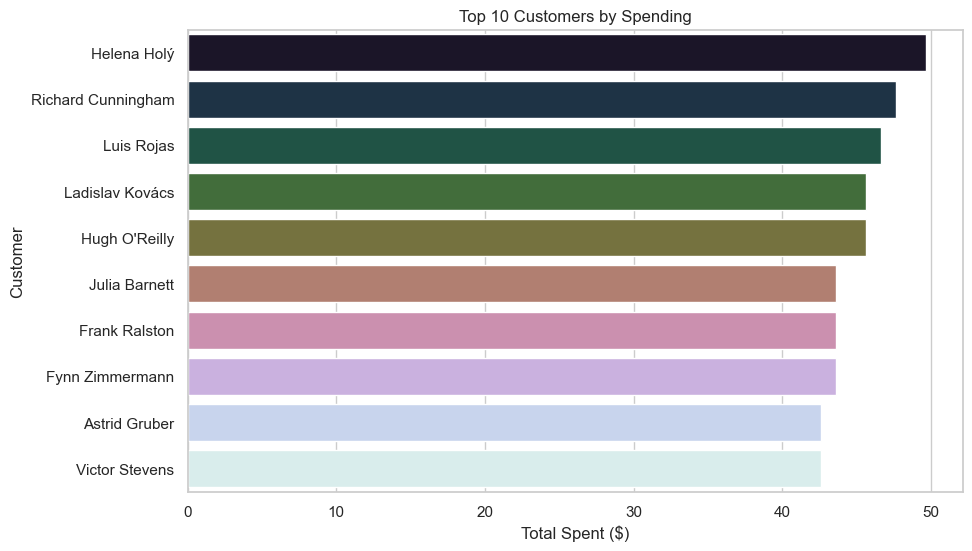

In [43]:
# Customers
plt.figure(figsize=(10,6))
sns.barplot(data=customer_df, x="TotalSpent", y="Customer", hue="Customer", palette="cubehelix", legend=False)
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spent ($)")
plt.ylabel("Customer")
plt.show()

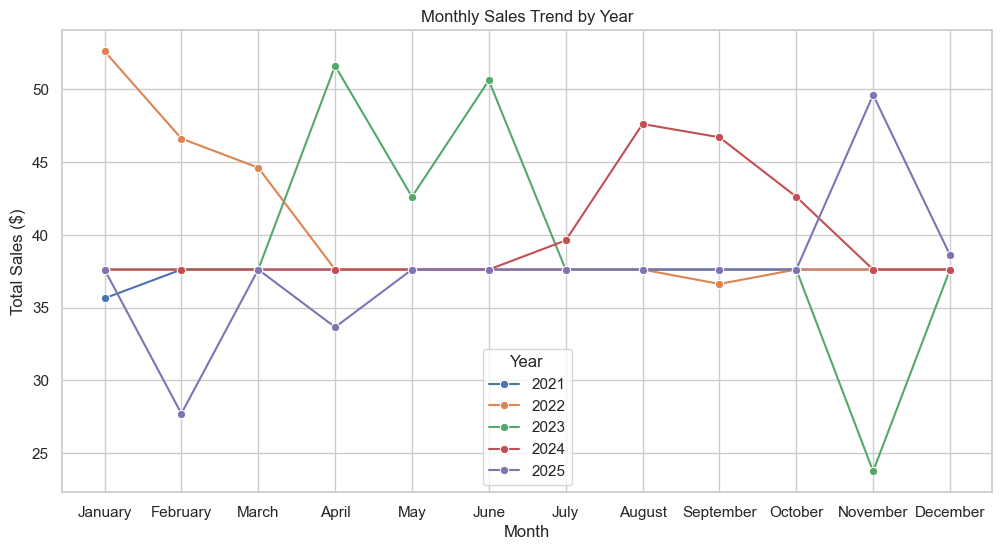

In [45]:
# Sales Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x="Month", y="MonthlySales", hue="Year", marker="o")
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.legend(title="Year")
plt.show()